<a href="https://colab.research.google.com/github/arzucivelekoglu/deep_learning_image_augmentation/blob/main/image_augmentation_techniques_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 👀 **Image Augmentation**

Derin öğrenme modelleriyle çalışırken, modelimi eğitmek için çok fazla veriye ihtiyacımız olur. 

Görüntü büyütme tekniği, veri kümenizin boyutunu genişletmenin harika bir yoludur. Orijinal veri kümenizden yeni dönüştürülmüş görüntüler elde edebilirsiniz. 

Görüntü büyütme, aynı görüntünün birden çok dönüştürülmüş kopyasıyla sonuçlanan orijinal görüntülere farklı dönüşümler uygulama tekniğidir. Bununla birlikte, her kopya, uyguladığınız kaydırma, döndürme, çevirme vb. büyütme tekniklerine bağlı olarak belirli yönlerde diğerinden farklıdır.

Bu küçük miktarlardaki varyasyonları orijinal görüntüye uygulamak, hedef sınıfı değiştirmez, yalnızca nesneyi gerçek hayatta yakalama konusunda yeni bir bakış açısı sağlar. Ve bu nedenle, derin öğrenme modelleri oluşturmak için oldukça sık kullanıyoruz.

⚡ Fazla uydurma, öğrenilecek çok az örneğe sahip olmaktan kaynaklanır ve bu da sizi yeni verilere genellenebilen bir model eğitemez hale getirir.

❗ Amaç, eğitim sırasında modelinizin aynı resmi asla iki kez görmemesidir. Bu, modelin daha iyi genelleştirilebilmesi için verilerin daha fazla yönüne maruz kalmasına yardımcı olur.

Görüntü büyütme için birçok farklı yöntem mevcut. Bunlardan bazıları **Matris tabanlı dönüşümler, TF.Keras ImageDataGenerator sınıfı, TensorFlow tf.image modülü veya OpenCV gibi çeşitli Python paketleri** tarafından yapılabilir.

## ✍ **Invariance**

Invariance (Değişmezlik), sinir ağları bağlamında, girdi dönüştürüldüğünde sonucun (tahmin) değişmediği anlamına gelir. 

Görüntü sınıflandırıcı olan bir CNN düşünelim (bu benzetme nesne algılamaya da uygulanabilir). Görüntüdeki konumundan bağımsız olarak sınıflandırılan nesnenin doğru bir şekilde tanınmasını istiyoruz. Girdiyi, nesne görüntüde yeni bir konuma kaydırılacak şekilde dönüştürürsek, sonucun (tahmin) değişmeden kalmasını isteriz.

Matris işlemleri kullanılarak verimli bir şekilde gerçekleştirilen görüntü büyütme ön işlemesini kullanarak Translational/scale invariance görüntüleri otomatik olarak oluşturmanın basit bir yöntemi olduğu ortaya çıktı.

### **Translational invariance**

Bu alt bölüm, bir eğitim veri kümesindeki görüntülerin, modelin görüntüdeki konumundan bağımsız olarak görüntüdeki nesneyi tanımayı öğreneceği şekilde manuel olarak nasıl büyütüleceğini kapsar. Örneğin, modelin, atın görüntüde hangi yöne baktığından bağımsız olarak bir atı veya elmanın arka planda nerede olduğuna bakılmaksızın bir elmayı tanımasını istiyoruz.

Translational invariance şunları içerir:

* Flip
* Rotate 90/180/270
* Rotation
* Shift

### **FLIP**
Matris çevirme, görüntüyü dikey veya yatay eksende çevirerek dönüştürür. 

Aşağıdaki kod, Python'un **OpenCV** kitaplığında bir matris devrik yöntemi kullanılarak bir görüntünün dikey (ayna) ve yatay olarak nasıl çevrileceğini gösterir:

In [5]:
import cv2 
import matplotlib.pyplot as plt

image = cv2.imread("/content/dog.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#plt.imshow(image)

# flip = 0 y ekseninde görüntüyü döndürdü  - Resmi yatay eksende çevirir (baş aşağı)
img1 = cv2.flip(image,0) 

# flip = 1 x eksenininde görüntüyü döndürdü - Görüntüyü dikey eksende çevirir (ayna)
img2 = cv2.flip(image,1) 

# flip = -1 ise x ve y ekseninde döndürme işlemi yaptı
img3 = cv2.flip(image,-1)


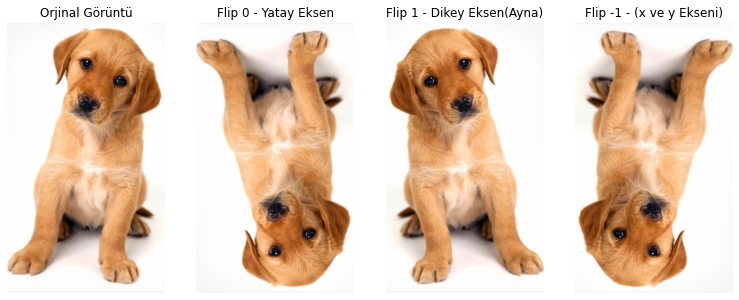

Bu kod, **NumPy**'de bir matris devrik yöntemi kullanarak bir görüntünün dikey (ayna) ve yatay olarak nasıl çevrileceğini gösterir:

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

image = cv2.imread("/content/dog.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resmi yatay eksende çevirir (baş aşağı)
img1 = np.flip(image,0)

#Görüntüyü dikey eksende çevirir (ayna)
img2 = np.flip(image,1)


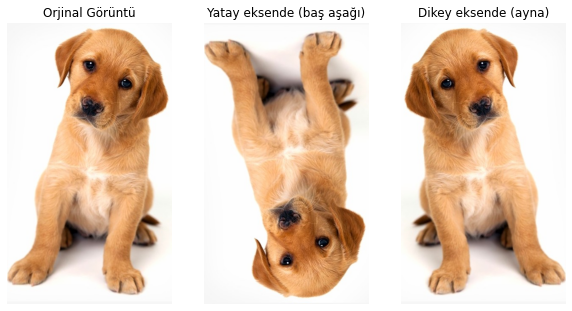

### **RATATE 90/180/270**

Döndürmelere ek olarak, bir görüntüyü 90 derece (sol), 180 derece ve 270 derece (sağ) döndürmek için bir matris devrik işlemi kullanılabilir.

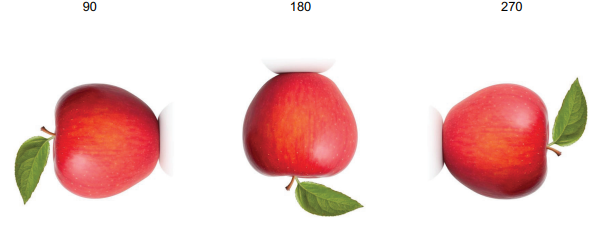

*Şekil 4.13 Bir elmanın karşılaştırması: 90-, 180- ve 270 derecelik dönüşler*

In [18]:
import cv2
from matplotlib import pyplot as plt

image = cv2.imread("/content/dog.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

rotate = np.rot90(image, 1) # 90 Derece
rotate = np.rot90(image, 2) # 180 Derece
rotate = np.rot90(image, 3) # 270 D2rece


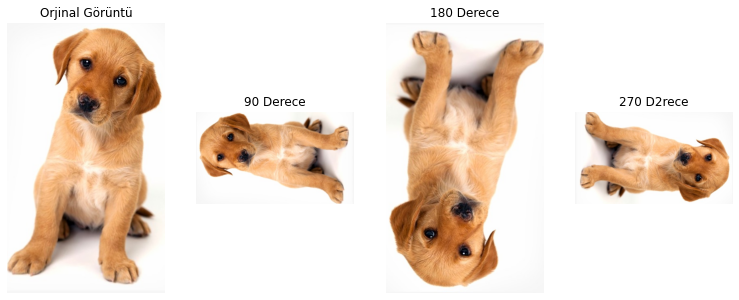

❗ Görüntüyü 90 veya 270 derece çevirdiğinizde görüntünün yönünü değiştiriyorsunuz, bu görüntünün yüksekliği ve genişliği aynıysa sorun değil. Aksi takdirde, yükseklik ve genişlik döndürülen görüntüye aktarılacak ve sinir ağının giriş vektörüyle eşleşmeyecektir. Bu durumda, görüntüyü yeniden boyutlandırmak için imutils modülünü veya başka araçları kullanmalısınız.

### **ROTATION**

Döndürme, görüntüyü –180 ve 180 derece arasında döndürerek dönüştürür. Genellikle dönme derecesi rastgele seçilir. Döndürme aralığını, modelin dağıtılacağı ortamla eşleşecek şekilde sınırlamak da isteyebilirsiniz. Aşağıda bazı yaygın uygulamalar verilmiştir:

* Görüntüler ölü olacaksa, –15 ila 15 derece aralığı kullanın
* Görüntüler eğimliyse –30 ila 30 derece aralığı kullanın.
* Paketler veya para gibi küçük nesneler için –180 ila 180 derece aralığının tamamını kullanın

Döndürmeyle ilgili başka bir sorun da, bir görüntüyü 90, 180 veya 270 dışında aynı boyuttaki sınırlar içinde döndürürseniz, görüntünün kenarının bir kısmının sınırın dışında kalmasıdır (kırpılır).

Elmanın görüntüsünü 45 derece döndürmek için PIL yöntemi döndürme() kullanımına bir örnektir. Elmanın alt kısmının ve yaprağının kırpıldığını görebilirsiniz.

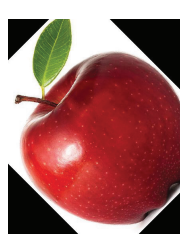

❗ Bir döndürme işlemenin doğru yolu, resmin hiçbirinin kırpılmaması için daha büyük bir sınırlayıcı alan içinde döndürmek ve ardından döndürülen resmi orijinal boyutuna geri döndürmektir.

(-0.5, 390.5, 669.5, -0.5)

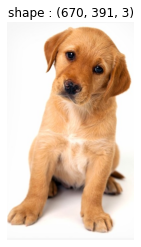

In [19]:
import cv2, imutils
from matplotlib import pyplot as plt 

image = cv2.imread("/content/dog.jpeg")
image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.title(f"shape : {image.shape}")
plt.axis("off")

(-0.5, 749.5, 749.5, -0.5)

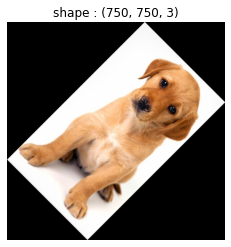

In [20]:
# Resmi 45 derece döndürüyoruz

rotate = imutils.rotate_bound(image, 45)
plt.imshow(rotate)
plt.title(f"shape : {rotate.shape}")
plt.axis("off")

Görüldüğü üzere orjinal görüntü boyutu ve 45 derecelik döndürme sonucunda oluşan görüntünün boyutları farklı oldu. 

Bunu düzeltmek için döndürme işlemi yaptığımız görüntüyü `resize` ile orjinal görüntü boyutuna geri dönüştürücez.

(-0.5, 390.5, 669.5, -0.5)

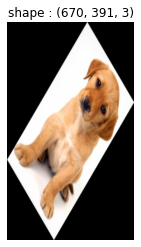

In [28]:
# Resmi orijinal şekline geri döndürür

shape = (image.shape[1], image.shape[0])

rotate = cv2.resize(rotate, (shape), interpolation = cv2.INTER_AREA)
plt.imshow(rotate)
plt.title(f"shape : {rotate.shape}")
plt.axis("off")

### **SHIFT**

Bir shift (kaydırma), görüntüdeki piksel verilerini dikey (yükseklik) veya yatay (genişlik) eksende +/– kaydırır.

Bu, sınıflandırılan nesnenin görüntüsündeki konumu değiştirecektir. Aşağıdaki şekil, %10 aşağı ve %10 yukarı kaydırılan elma görüntüsünü göstermektedir.

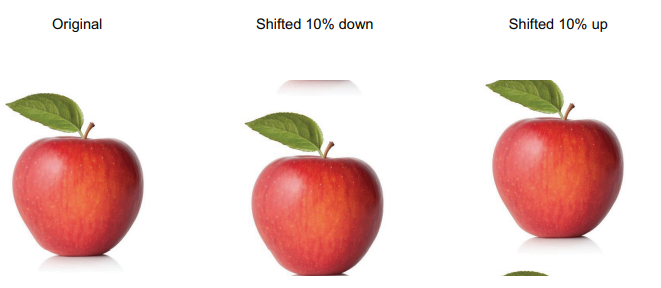


Aşağıdaki kod, NumPy `np.roll()` yöntemi kullanılarak görüntünün +/– %10 dikey ve yatay olarak kaydırılmasını gösterir:

In [29]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 

image = cv2.imread("/content/dog.jpeg")
image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)

height = image.shape[0] # 670
width = image.shape[1] #391

# Görüntüyü %10 oranında aşağı kaydırır
roll1 = np.roll(image, height // 10, axis= 0)

# Görüntüyü %10 yukarı kaydırır
roll2 = np.roll(image, -(height // 10), axis=0)

# Resmi %10 sağa kaydırır
roll3 = np.roll(image, width // 10, axis=1)

# Resmi %10 sola kaydırır
roll4 = np.roll(image, -(width // 10), axis=1) 

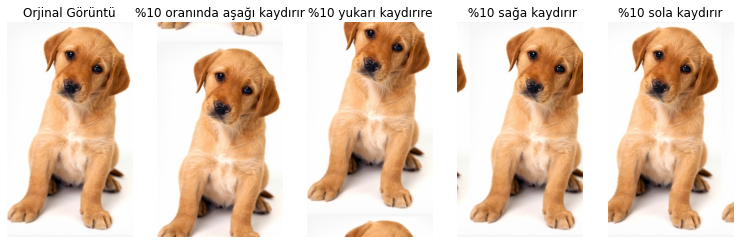

Bir kaydırma, matrisin bir yuvarlanma işlemi olarak uygulanması açısından verimlidir; satırlar (yükseklik) veya sütunlar (genişlik) kaydırılır. Bu şekilde, sondan kaydırılan pikseller başa eklenir.

Kaydırma çok büyükse, görüntü her biri diğerinin zıttı olacak şekilde iki parçaya bölünebilir. Elmanın %50 oranında dikey olarak kaydığını ve kırık olduğunu göstermektedir.

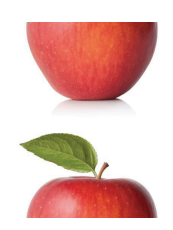



Kırılmayı önlemek için görüntünün kaymasını %20'den fazla olmayacak şekilde sınırlamak genel bir uygulamadır. Alternatif olarak, OpenCV kullanılarak burada gösterildiği gibi görüntüyü kırpabilir ve kesilen alanı siyah bir ped ile doldurabiliriz:

(-0.5, 390.5, 669.5, -0.5)

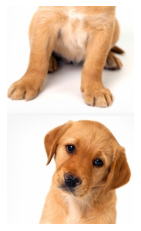

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("/content/dog.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

roll = np.roll(image, height // 2, axis= 0)
plt.imshow(roll)
plt.axis("off")

(-0.5, 390.5, 334.5, -0.5)

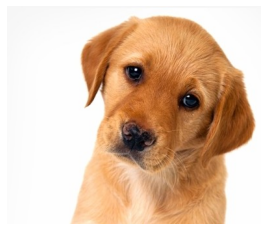

In [34]:
# Resmin altını (%50) düşürür
image = image [0: height//2, :,:]

plt.imshow(image)
plt.axis("off")

(-0.5, 390.5, 668.5, -0.5)

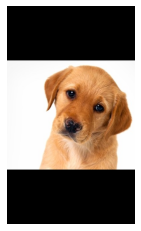

In [35]:
# Görüntüyü orijinal boyutuna geri döndürmek için siyah kenarlık yapar
image = cv2.copyMakeBorder(image, (height//4), (height//4), 0, 0, cv2.BORDER_CONSTANT, 0) 

plt.imshow(image)
plt.axis("off")

## **Scale invariance**

Modelin, görüntünün çoğunu kaplamasına veya görüntünün arka plan üzerinde kaplanmış küçük bir parçası olmasına bakılmaksızın bir elmayı tanımasını istiyoruz. Bir görüntü girişi bağlamında Scale invariance (ölçek değişmezliği)aşağıdakileri içerir:

* Zoom (nesne görüntüde herhangi bir boyutta olabilir)

* Affine (nesne herhangi bir perspektiften görüntülenebilir)



### **ZOOM**

Yakınlaştırma, bir yeniden boyutlandırma ve kırpma işlemiyle gerçekleştirilen, görüntünün merkezinden yakınlaştırarak görüntüyü dönüştürür. Görüntünün merkezini bulursunuz, merkez etrafındaki kırpma sınırlama kutusunu hesaplarsınız ve ardından görüntüyü kırparsınız.

OpenCV görüntüleme kitaplığı kullanılarak bir görüntünün nasıl yakınlaştırılacağını gösterir.

Bir görüntüyü cv2.resize() enterpolasyonu kullanarak büyütürken :  
* cv2.INTER_CUBIC genellikle en iyi sonuçları verir.
* cv2.INTER_LINEAR enterpolasyonu daha hızlıdır ve neredeyse karşılaştırılabilir sonuçlar sağlar. 
* cv2.INTER_AREA enterpolasyonu genellikle bir görüntüyü küçültürken kullanılır.

(-0.5, 390.5, 669.5, -0.5)

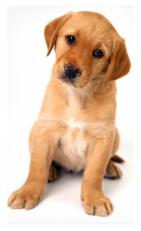

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("/content/dog.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis("off")

(-0.5, 155.5, 267.5, -0.5)

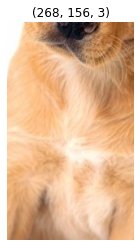

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("/content/dog.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

zoom = 2.5
height, width = image.shape[:2]

#Ölçeklenen görüntünün merkezini bulur
center = (image.shape[0]//2, image.shape[1]//2)
z_height = int(height // zoom)
z_width = int(width // zoom) 

# Bir kırpma sınırlama kutusu oluşturarak yakınlaştırılmış görüntüyü dilimler (keser)
image = image[(center[0] - z_height//2):(center[0] + z_height//2), center[1] -
 z_width//2:(center[1] + z_width//2)]

plt.imshow(image)
plt.title(image.shape)
plt.axis("off") 

(-0.5, 390.5, 669.5, -0.5)

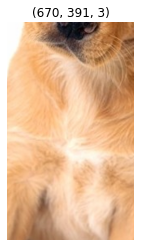

In [30]:
# Kırpılan görüntüyü orijinal boyutuna geri döndürür (büyütür)

image = cv2.resize(image, (width, height), interpolation=cv2.INTER_CUBIC) 
plt.imshow(image)
plt.title(image.shape)
plt.axis("off")

## ⚡ **KerasImageDataGenerator Kullanarak  Görüntü Büyütme**

Görüntü büyütme tekniği, veri kümenizin boyutunu genişletmenin harika bir yoludur. Orijinal veri kümenizden yeni dönüştürülmüş görüntüler elde edebiliriz.

Görüntü büyütme, aynı görüntünün birden çok dönüştürülmüş kopyasıyla sonuçlanan orijinal görüntülere farklı dönüşümler uygulama tekniğidir. Bununla birlikte, her kopya, uyguladığınız kaydırma, döndürme, çevirme vb. büyütme tekniklerine bağlı olarak belirli yönlerde diğerinden farklıdır.

* Bu görüntü büyütme teknikleri, yalnızca veri kümenizin boyutunu genişletmekle kalmaz, aynı zamanda veri kümesinde, modelinizin görünmeyen veriler üzerinde daha iyi genelleme yapmasını sağlayan bir varyasyon düzeyi içerir. Ayrıca model, yeni, biraz değiştirilmiş görüntüler üzerinde eğitildiğinde daha sağlam hale gelir.

* Yalnızca birkaç satır kodla, gerçek dünya senaryosunda mümkün olmayan yeni görüntüler toplama konusunda endişelenmenize gerek kalmadan anında benzer görüntülerden oluşan büyük bir külliyat oluşturabilirsiniz. 


* Keras ImageDataGenerator sınıfını kullanmanın asıl yararı, gerçek zamanlı veri büyütme sağlamak üzere tasarlanmış olmasıdır.

* Modeliniz henüz eğitim aşamasındayken anında artırılmış görüntüler oluşturuyor.

* Yalnızca dönüştürülmüş görüntüleri döndürür ve bunları orijinal görüntüler topluluğuna eklemez. 

* ImageDataGenerator'ın diğer bir avantajı da daha düşük bellek kullanımı gerektirmesidir. 

TF.Keras görüntü ön işleme modülü, ImageDataGenerator sınıfıyla çok çeşitli görüntü büyütmeyi destekler. Bu sınıf, artırılmış görüntü yığınları oluşturmak için bir oluşturucu oluşturur. Sınıf başlatıcı, artırma türünü belirtmek için giriş olarak sıfır veya daha fazla parametre alır. Bu bölümde ele alacağımız bazı parametreler şunlardır:
```
◼ horizontal_flip=True|False
◼ vertical_flip=True|False
◼ rotation_range=degrees
◼ zoom_range=(lower, upper)
◼ width_shift_range=percent
◼ height_shift_range=percent
◼ brightness_range=(lower, upper)
```

### **FLIP (Çevirmek)**

*horizontal and vertical flips - yatay ve dikey çevirmeler*


`ImageDataGenerator` sınıfı,  dikey veya yatay eksen boyunca döndürmek için `horizontal_flip` ve `Vertical_flip` parametrelerine sahiptir.



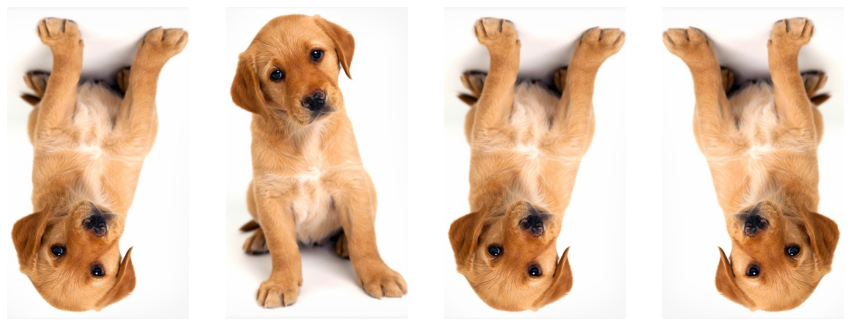

In [31]:
import cv2
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image = image = cv2.imread("/content/dog.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Görüntüyü ImageDataGenerator'a verebilmemiz için kanal sayısının 4 olması gerekiyor
image = image.reshape(1, 670, 391, 3)

# Veri tipini de  float32 yapıyoruz
image = image.astype('float32')

# Büyütme için Data Generator'u tanımlıyoruz
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# İterotor oluşturuyoruz
aug_iter = datagen.flow(image, batch_size=1)


#ilk olarak boş bir figure oluşturuyoruz
fig, ax = plt.subplots(nrows= 1, ncols =4, figsize=(15,15))

#for döngüsü kuruyoruz. Yukarıda 3 tane plot figure kurduğumuz için döngü sayısımızı da 3 olacak şekilde yazıyoruz
for i in range(4): # 0 1 2
  image = next(aug_iter)[0].astype('uint8')

  ax[i].imshow(image)
  ax[i].axis("off")

### **ROTATION (DÖNDÜRME)**

Görüntü döndürme, yaygın olarak kullanılan büyütme tekniklerinden biridir ve modelin nesnenin yönüne göre değişmez olmasını sağlar.

`ImageDataGenerator` sınıfı, `rotate_range` bağımsız değişkeninde bir tamsayı değeri sağlayarak görüntüleri 0 ile 360 ​​arasında herhangi bir derecede rastgele döndürmenize olanak tanır .

Görüntü döndürüldüğünde, bazı pikseller görüntünün dışına taşınacak ve doldurulması gereken boş bir alan bırakacaktır. Bunu, sabit bir değer veya en yakın piksel değerleri gibi farklı şekillerde doldurabilirsiniz. Bu, `fill_mode` argümanında belirtilir. ve varsayılan değer, boş alanı en yakın piksel değerleriyle değiştiren "`nearest`" değeridir.


```
datagen = ImageDataGenerator(rotation_range=60, fill_mode='nearest')
```



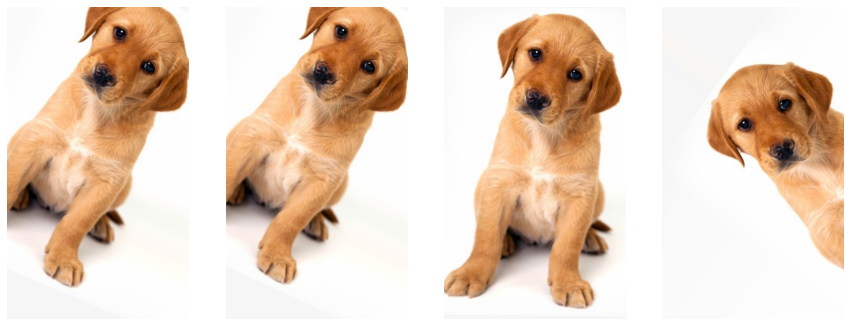

In [34]:
import cv2
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image = image = cv2.imread("/content/dog.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = image.reshape(1, 670, 391, 3)
image = image.astype('float32')

datagen = ImageDataGenerator(rotation_range=60)
aug_iter = datagen.flow(image, batch_size=1)



fig, ax = plt.subplots(nrows= 1, ncols =4, figsize=(15,15))

for i in range(4): # 0 1 2
  image = next(aug_iter)[0].astype('uint8')

  ax[i].imshow(image)
  ax[i].axis("off")

### **ZOOM** 

Zoom, görüntüyü rasgele yakınlaştırır veya görüntüyü uzaklaştırır.

`ImageDataGenerator` sınıfı, `zoom_range` bağımsız değişkeninde yakınlaştırma için bir kayan değer alır. Alt ve üst sınırı belirten iki değer içeren bir liste sağlayabilirsiniz. Aksi takdirde, bir kayan değer belirtirseniz, yakınlaştırma  [1-zoom_range,1+zoom_range]. aralığında yapılacaktır.

1'den küçük herhangi bir değer görüntüyü yakınlaştırır. Oysa 1'den büyük herhangi bir değer görüntüyü uzaklaştırır.

Bu kodda, 0,5'ten (uzaklaştırma) 2'ye (yakınlaştırmaya) rastgele değerler ayarlamak için `zoom_range` parametresini kullanıyoruz. Değer, bir demet veya iki öğeden oluşan bir liste olarak belirtilebilir:

```
datagen = ImageDataGenerator(zoom_range=(0.5, 2))
```



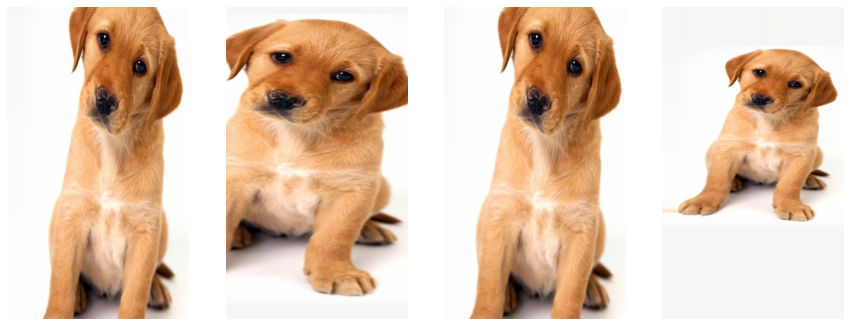

In [37]:
import cv2
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image = image = cv2.imread("/content/dog.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


image = image.reshape(1, 670, 391, 3)
image = image.astype('float32')

datagen = ImageDataGenerator(zoom_range=(0.5, 2))
aug_iter = datagen.flow(image, batch_size=1)


fig, ax = plt.subplots(nrows= 1, ncols =4, figsize=(15,15))
for i in range(4): # 0 1 2
  image = next(aug_iter)[0].astype('uint8')

  ax[i].imshow(image)
  ax[i].axis("off")


### **SHIFT**

Nesne her zaman görüntünün merkezinde olmayabilir. Bu sorunun üstesinden gelmek için görüntünün piksellerini yatay veya dikey olarak kaydırabiliriz; bu, tüm piksellere belirli bir sabit değer ekleyerek yapılır.

`ImageDataGenerator` sınıfı, görüntünün **dikey kayması için `height_shift_range`** ve görüntünün **yatay kayması için `width_shift_range`** bağımsız değişkenine sahiptir .

 **Değer bir kayan sayıysa, bu, görüntünün kaydırılacak genişlik veya yükseklik yüzdesini gösterir. Aksi takdirde, bir tamsayı değeriyse, genişlik veya yükseklik bu birçok piksel değeriyle kaydırılır.**


```
datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)

```



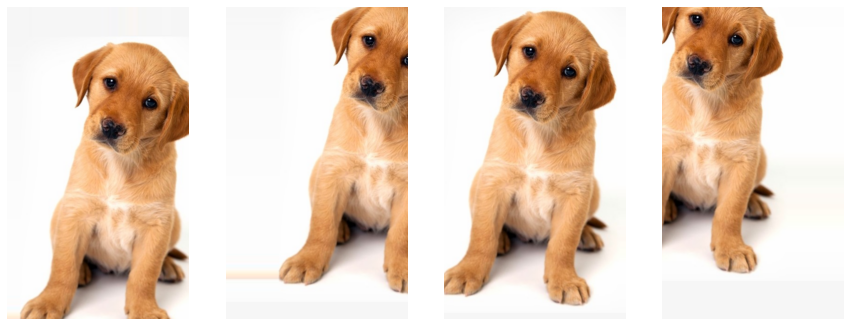

In [40]:
import cv2
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image = image = cv2.imread("/content/dog.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = image.reshape(1, 670, 391, 3)
image = image.astype('float32')

datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)
aug_iter = datagen.flow(image, batch_size=1)

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,15))


for i in range(4):
	image = next(aug_iter)[0].astype('uint8')

	ax[i].imshow(image)
	ax[i].axis('off')

### **BRIGHTNESS (PARLAKLIK)**

Görüntünün parlaklığını rastgele değiştirir. Aynı zamanda çok faydalı bir büyütme tekniğidir çünkü çoğu zaman nesnemiz mükemmel aydınlatma koşullarında olmayacaktır. Bu nedenle, modelimizi farklı aydınlatma koşullarında görüntüler üzerinde eğitmek zorunlu hale geliyor.

Parlaklık, `ImageDataGenrator` sınıfında `brightness_range`  bağımsız değişkeni aracılığıyla kontrol edilebilir. İki kayan değerden oluşan bir liste kabul eder ve bu aralıktan bir parlaklık kaydırma değeri seçer. 1.0'ın altındaki değerler görüntüyü koyulaştırırken, 1.0'ın üzerindeki değerler görüntüyü aydınlatır.


Aşağıdaki kodda, 0,5'ten (daha koyu) 2'ye (daha parlak) rastgele değerler ayarlamak için parlaklık_aralığı parametresini kullanıyoruz. Değer, bir demet veya iki öğeden oluşan bir liste olarak belirtilebilir:


```
datagen = ImageDataGenerator(brightness_range=(0.5, 2))
```



❗ *Son bir not olarak, piksel değerine sabit bir miktar ekleyen parlaklık gibi dönüşümler normalleştirme veya standardizasyondan sonra yapılır. Daha önce yapılırsa, normalleştirme ve standardizasyon, değerleri aynı orijinal aralığa sıkıştırarak dönüşümü geri alır.*

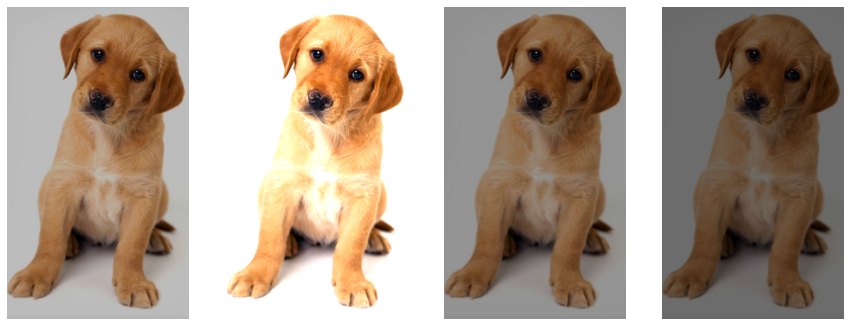

In [43]:
import cv2
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image = image = cv2.imread("/content/dog.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


image = image.reshape(1, 670, 391, 3)
image = image.astype('float32')

datagen = ImageDataGenerator(brightness_range=[0.3,1.5])
aug_iter = datagen.flow(image, batch_size=1)

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,15))

for i in range(4):
	image = next(aug_iter)[0].astype('uint8')
	ax[i].imshow(image)
	ax[i].axis('off')